## Titanic Shipwreck Survival Prediction

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import file

In [4]:
df=pd.read_csv("train.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Checking for null values and missing data

In [8]:
df = df.drop_duplicates() 
df.duplicated().values.any()

False

In [9]:
df = df.fillna(method="ffill")
pd.isnull(df).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

## EDA

### Feature Engineering

In [117]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age<10:
       return 'child'
    else :
       return sex

In [118]:
df['person']=df[['Age','Sex']].apply(male_female_child,axis=1)

### Survival count comparisons

In [92]:
survived_count = df.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

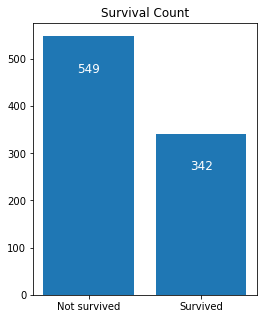

In [94]:
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Survival Count')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

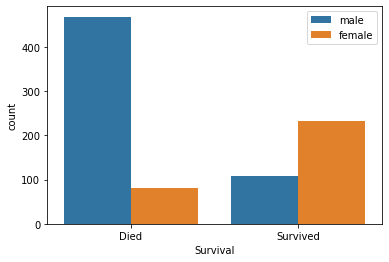

In [133]:
g = sns.countplot(df['Survived'], hue = df['Sex'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

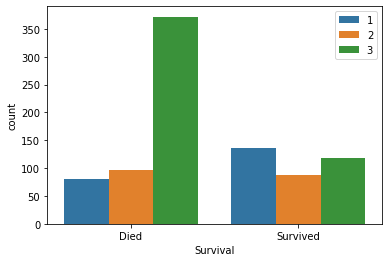

In [134]:
g = sns.countplot(df['Survived'], hue = df['Pclass'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

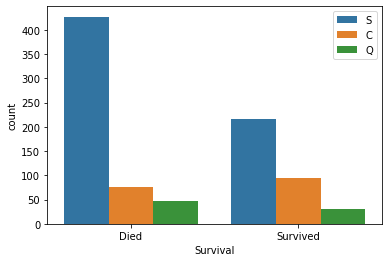

In [147]:
g = sns.countplot(df['Survived'], hue = df['Embarked'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

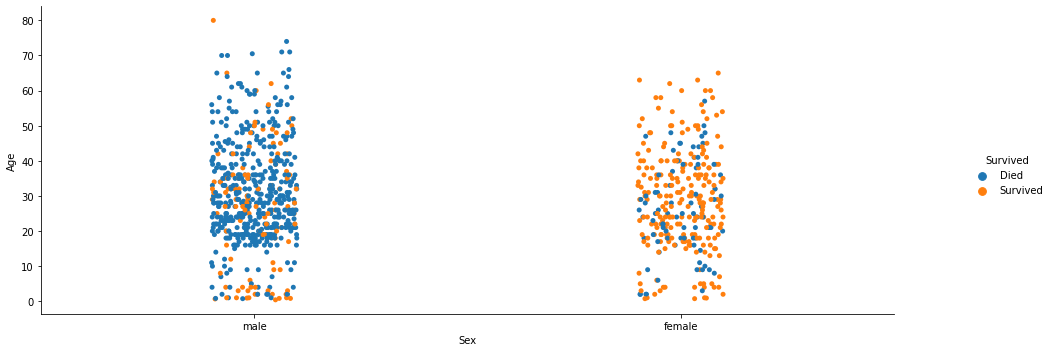

In [143]:
g = sns.catplot(y="Age", x="Sex", hue="Survived", data=df)
new_labels = ['Died', 'Survived']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
g.fig.set_figwidth(16)

### Age distribution of passengers

In [128]:
ages = df[df['Age'].notnull()]['Age'].values
ages_hist = np.histogram(ages, bins=[0,10,20,30,40,50,60,70,80,90])

In [129]:
ages_hist_labels = ['0–10','111–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90']

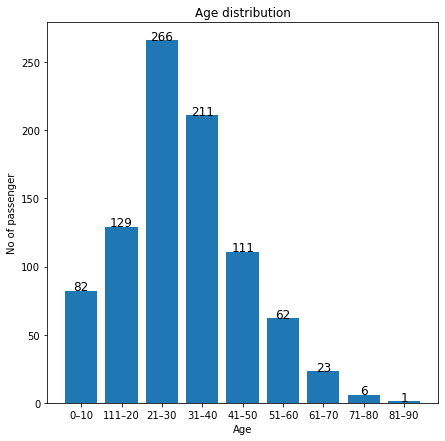

In [130]:
plt.figure(figsize=(7,7))
plt.title('Age distribution')
plt.bar(ages_hist_labels, ages_hist[0])
plt.xlabel('Age')
plt.ylabel('No of passenger')
for i, bin in zip(ages_hist[0], range(9)):
    plt.text(bin, i+3, str(int(i)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

### Graphs showing relation of survival of different gropus of people belonging to different classes

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


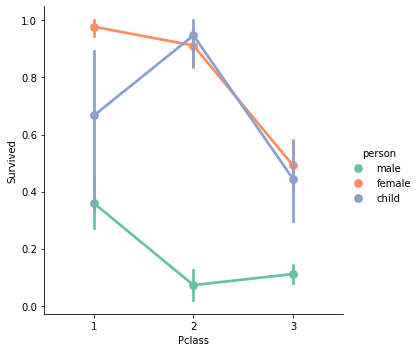

In [119]:
sns.factorplot('Pclass','Survived',hue='person',data=df,palette='Set2')

C:\Users\mohmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


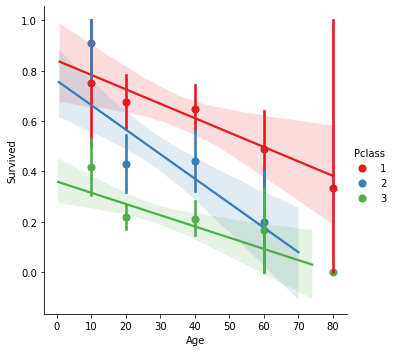

In [146]:
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='Set1', x_bins=generations)

#### From this plot we see that people in class 3 had the lowest survival and class one the highest, we also see that the probability of suvival decreases with increase in age

### Passenger ticket distributions

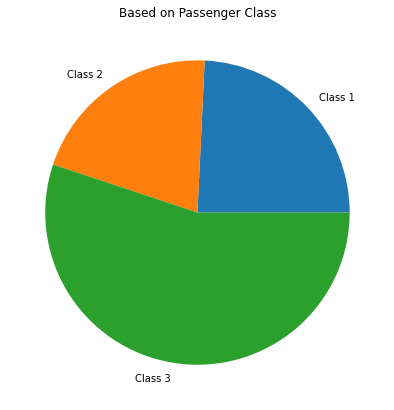

In [106]:
pclass = df.groupby('Pclass')['Pclass'].count()
plt.figure(figsize=(7,7))
plt.title('Based on Passenger Class')
plt.pie(pclass.values, labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

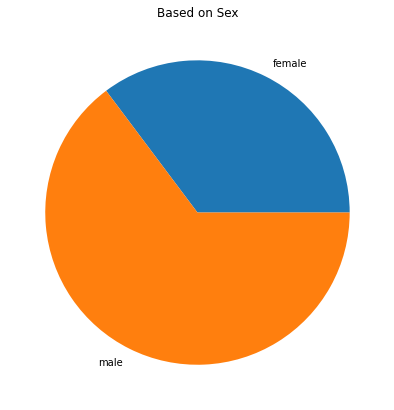

In [107]:
sc = df.groupby('Sex')['Sex'].count()
plt.figure(figsize=(7,7))
plt.title('Based on Sex')
plt.pie(sc.values, labels=sc.index)
plt.show()

### FInding cabin distribution

C    259
B    201
E    147
D    126
A     77
F     55
G     24
T      1
Name: Cabin, dtype: int64



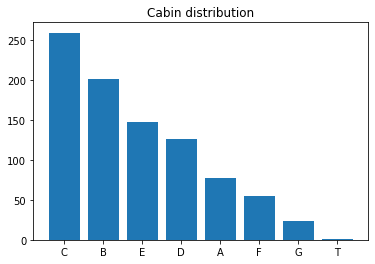

In [131]:
def take_initial(x):
    return x[0]

cabins = df['Cabin'].dropna()

cabins = cabins.apply(take_initial)

cabins_count = cabins.value_counts()
print(cabins_count, end='\n\n')

plt.title('Cabin distribution')
plt.bar(cabins_count.index, cabins_count.values)
plt.show()

## Logistical Regression model

In [57]:
ndf=df.drop(['PassengerId', 'Name', 'Fare','Ticket', 'Cabin'.'person' ], axis=1)

### Features and variable

In [58]:
X1 = ndf.iloc[:, 1:] # features
y = ndf.iloc[:, 0]  # Dependent variable

In [59]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [60]:
X1

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,19.0,1,2,S
889,1,male,26.0,0,0,C


In [51]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Encoding

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-5])], remainder='passthrough')
X1 = np.array(ct.fit_transform(X))

In [87]:
X=pd.DataFrame(X1).drop(0,axis=1)

In [88]:
X

,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,1.0,3,22.0,1,0
1,0.0,1.0,0.0,0.0,1,38.0,1,0
2,0.0,0.0,0.0,1.0,3,26.0,0,0
3,0.0,0.0,0.0,1.0,1,35.0,1,0
4,1.0,0.0,0.0,1.0,3,35.0,0,0
...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,1.0,2,27.0,0,0
887,0.0,0.0,0.0,1.0,1,19.0,0,0
888,0.0,0.0,0.0,1.0,3,19.0,1,2
889,1.0,1.0,0.0,0.0,1,26.0,0,0


In [89]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [77]:
X

array([[0.0, 0.0, 1.0, ..., 22.0, 1, 0],
       [1.0, 0.0, 0.0, ..., 38.0, 1, 0],
       [0.0, 0.0, 1.0, ..., 26.0, 0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 19.0, 1, 2],
       [1.0, 0.0, 0.0, ..., 26.0, 0, 0],
       [0.0, 1.0, 0.0, ..., 32.0, 0, 0]], dtype=object)

### Splitting data

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:, :-1] = sc.fit_transform(X_train[:, :-1])
X_test[:, :-1] = sc.fit_transform(X_test[:, :-1])

### Training model

In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Accuracy - Confusion Matrix

In [85]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 14]
 [19 50]]


0.8156424581005587

#### We see that the correct number of predictions are - 146 (96+50) and the wrong predictions are - 33 (19+14)